## Importing the libraries.

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the datasets.

In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

## Exploring both datasets.

### Species.

In [3]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


#### The `species_info.csv` contains information on the different species in the National Parks. 
#### The columns in the data set include:
#### `category` - The category of taxonomy for each species;
#### `scientific_name` - The scientific name of each species;
#### `common_names` - The common names of each species;
#### `conservation_status` - The species conservation status.

### Observations.

In [4]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


#### The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. 
#### The columns included are:
#### `scientific_name` - The scientific name of each species;
#### `park_name`- The name of the national park;
#### `observations` - The number of observations in the past 7 days.

### Checking datasets dimentions.

In [5]:
print(f'species shape: {species.shape}')
print(f'observations shape: {observations.shape}')

species shape: (5824, 4)
observations shape: (23296, 3)


#### The `species` dataset has 5,824 rows, and 4 columns, while `observations` has 23,2296 rows, and 3 columns. 

## Exploring ```species``` dataset more in depth.

### Dataset structure.

In [6]:
print(f'Total number of species: {species.scientific_name.nunique()}')
print(f'Total number of category: {species.category.nunique()}')
print(f'Names of categories: {species.category.unique()}')

Total number of species: 5541
Total number of category: 7
Names of categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


#### The `species` dataset contains 5541 different species, distribuited in 7 types of categories.

### Exploring the ```category``` column.

In [7]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

#### We can see that by far `Vascular Plant` is the most commun one and `Reptile` is the most rare.

### Exploring the ```conservation_status``` column.

In [8]:
print(f'Number of conservation statuses: {species.conservation_status.nunique()}')
print(f'Conservation statuses names: {species.conservation_status.unique()}')

Number of conservation statuses: 4
Conservation statuses names: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


#### The `conservation_status` column shows 4 different types of status and a 'nan' value. 

In [9]:
print(species.groupby('conservation_status').size())
print(f'The data shows {species.conservation_status.isna().sum()} NaNs values')

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
The data shows 5633 NaNs values


#### There are 5,633 NaNs values which, in this case, means that they are species without concerns. 
#### On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.

### Checking for duplicates.

In [10]:
print(species.duplicated().sum())

0


#### There is no duplicated values. 

## Looking at the `observations` dataset.

In [11]:
print(f'The data shows a total of {observations.park_name.nunique()} parks')
print(f'The parks names are the following: {observations.park_name.unique()}')

The data shows a total of 4 parks
The parks names are the following: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


#### We can see that the data was captured on four different parks.

### Checking the total number of observations recored.

In [12]:
print(f'Observations: {observations.observations.sum()}')

Observations: 3314739


#### The dataset has a total of 3314739 observations divided amoung four parks.

### Taking a closer look at the `scientific_name` column.

In [13]:
print(f'Scientific names: {observations.scientific_name.nunique()}')

Scientific names: 5541


#### The `observations` dataset shows a total of 5541 different scientific names registered. The same as the `species` dataset. 

### Checking for duplicates.

In [14]:
print(observations.duplicated().sum())

15


#### There is 15 duplicated rows in the `observations` dataset.

### Deleting the duplicates.

In [15]:
observations = observations.drop_duplicates()

### Checking for NaNs.

In [16]:
print(observations.isnull().sum())

scientific_name    0
park_name          0
observations       0
dtype: int64


#### There is no NaNs values in this dataset.

### Filling the NaNs in the `species` dataset.

#### The possible values for this column are the following: 
#### `Species of Concern`: declining or appear to be in need of conservation
#### `Threatened`: vulnerable to endangerment in the near future
#### `Endangered`: seriously at risk of extinction
#### `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

#### In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention` as this species are not in concern 

In [17]:
species.fillna('No Intervention', inplace = True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

## Analyzing the dataset

### Taking a look at how the species are distributed on the 'conservation_status' column

In [18]:
# Grouping the data to get a better understand of distribution of species among the conservation_status column.
conservationCategory = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
print(conservationCategory)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


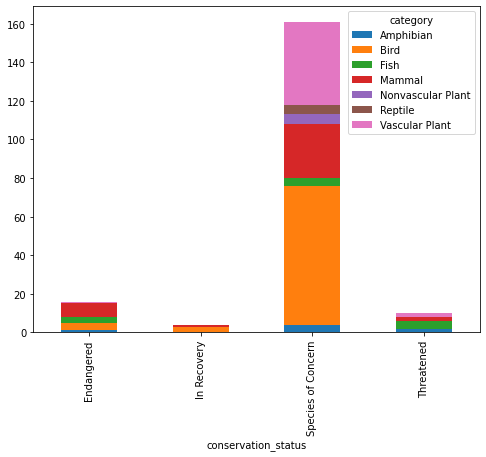

In [19]:
# Plotting a bar chart to visualize the distribution of species among the conservation_status column.
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), stacked = True)

#### It is possible to see that the biggest number of species are classified as `Species of Concern`. Having that the `Bird` category is the one with the biggest volume of species in this classification. 

### Analyzing the volume and distribution of each animal categories amoung the parks.

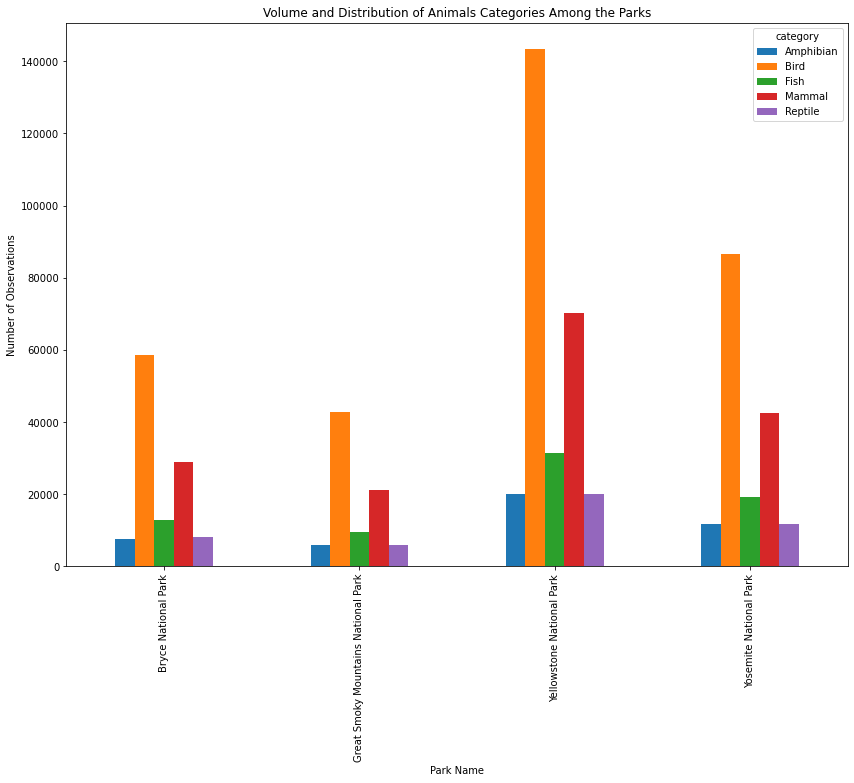

In [20]:
# Joining the observations with the species dataset.
outer = observations.merge(species, on = 'scientific_name', how = 'outer')

# Dorpping the plants categories from the dataset
criteria1 = outer['category'] == 'Vascular Plant'
outer = outer.drop(outer[criteria1].index) 

criteria2 = outer['category'] == 'Nonvascular Plant'
outer = outer.drop(outer[criteria2].index) 

# Grouping the data in the necessary order. 
outer_cate = outer.groupby(['park_name','category'])['observations'].sum().unstack()

# Plotting a bar char that shows the distribution and volume of each category among the parks.
ax = outer_cate.plot(kind = 'bar', figsize = (14,10))
plt.title('Volume and Distribution of Animals Categories Among the Parks')
plt.ylabel('Number of Observations')
plt.xlabel("Park Name")
plt.show()

#### It is possible to conclude that `Yellowstone National Park` has the biggest volume of animals for every category, and specially `birds`. 

## Checking the mammal population density among the parks.

### Creating a dataset with each park the total area (km²).

In [21]:
# Creating a new dataset.
data = [('Great Smoky Mountains National Park', 2144.10), ('Yosemite National Park', 3027.81),('Bryce National Park', 1342.57),('Yellowstone National Park', 8983.18)]
park_area = pd.DataFrame(data, columns=["park_name", "area_(km²)"])

print(park_area.head())

# The data was provided by ChatGPT.

                             park_name  area_(km²)
0  Great Smoky Mountains National Park     2144.10
1               Yosemite National Park     3027.81
2                  Bryce National Park     1342.57
3            Yellowstone National Park     8983.18


### Getting the total area of the parks combined. 

In [22]:
# Summing the total area of the four parks
total_area = park_area['area_(km²)'].sum()
print(f'Total area: {total_area}km²')

Total area: 15497.66km²


#### The four parks have a total area of 15497.66km².

### Counting the total mammal observations among the four pakrs. 

In [23]:
# Grouping the data to get the sum of mammal observations.
total_mammal_obs = outer[outer.category == 'Mammal'].groupby('category')['observations'].sum().reset_index()

# Transforming the total_mammal_obs in a df. 
m_obs_result = pd.DataFrame(total_mammal_obs)

print(f'Total observations: {m_obs_result.iloc[0,1]}')

Total observations: 162608


#### Was recored 162608 observations of mammals in the four parks combined.

### Encountering the general mammal population density among the four parks combined. 

In [24]:
# Isoleting the sum of observations from total_mammal_obs.
t_m_obs =  m_obs_result.iloc[0,1]

# Calculating the general mammal density.
general_m_density = round((t_m_obs / total_area),2)
print(f'General mammal density: {general_m_density}')

General mammal density: 10.49


#### The General mammal population density is 10 mammals per each km².

### Joining the `park_area` dataset with the `outer` dataset.  

In [25]:
# Joining the tables.
outer_area = outer.merge(park_area, on ='park_name', how = 'outer')
print(outer_area.head(2))

    scientific_name                            park_name  observations  \
0    Neovison vison  Great Smoky Mountains National Park            77   
1  Spizella pusilla  Great Smoky Mountains National Park            72   

  category   common_names conservation_status  area_(km²)  
0   Mammal  American Mink     No Intervention      2144.1  
1     Bird  Field Sparrow     No Intervention      2144.1  


#### Now each park has the indication of its area in km².

### Counting the total number of mammals on each park and checking the density of its population by km². 

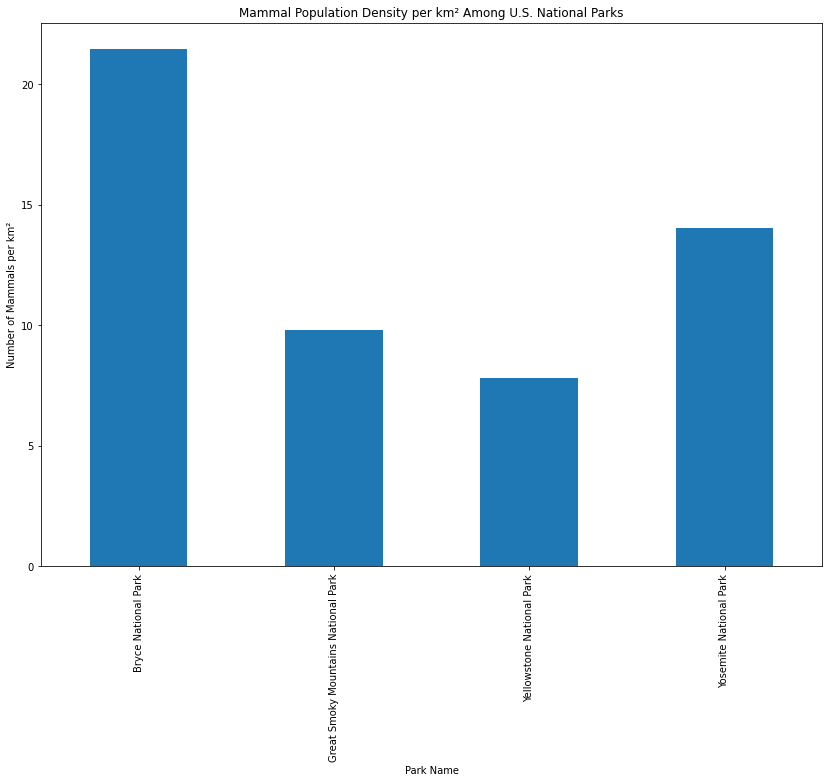

In [26]:
# Grouping the data to show the total population of mammals in each park and its total area.
outer_density = outer_area[outer_area.category == 'Mammal'].groupby(['park_name','area_(km²)', 'category'])['observations'].sum().reset_index().rename(columns ={'observations':'total_observations'})

# Chenging the outer_density to a df. 
outer_density = pd.DataFrame(outer_density)

# Finding the mammal population density for each park.
outer_density['population_density'] = outer_density['total_observations'] / outer_density['area_(km²)']
# print(outer_density)

# Plotting a bar chart to analyze the mammal population density by each park. 
ax = outer_density['population_density'].plot(kind = 'bar', figsize = (14,10))
ax = plt.gca()
ax.set_xticklabels(outer_density['park_name'])
plt.xlabel('Park Name')
plt.ylabel('Number of Mammals per km²')
plt.title('Mammal Population Density per km² Among U.S. National Parks')
plt.show()

#### Though the Yellowstone national park is the one with the biggest number mammals observations registered the Bryce National is the US national park with the higher probability of observing mammals as it is the park with a higher mammal population density.